# 1. Convolution

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'roadSaP.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [26]:
from scipy import signal
from scipy.special import comb

# Setup kernels
kernel_size = 3

mean_kernel = np.ones((kernel_size, kernel_size), np.float32) / kernel_size**2

# Gaussian kernel
gaussian_kernel = signal.windows.gaussian(kernel_size, std=1).reshape(kernel_size, 1)
gaussian_kernel = np.outer(gaussian_kernel, gaussian_kernel)
gaussian_kernel /= gaussian_kernel.sum()

# Binomial kernel
binomial_kernel = [comb(kernel_size - 1, i) for i in range(kernel_size)]
binomial_kernel = np.outer(binomial_kernel, binomial_kernel)
binomial_kernel /= binomial_kernel.sum()

In [27]:
# Print kernels
print('Mean kernel:')
print(mean_kernel)
print('Gaussian kernel:')
print(gaussian_kernel)
print('Binomial kernel:')
print(binomial_kernel)

Mean kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Gaussian kernel:
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
Binomial kernel:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [28]:
mean_image = cv2.filter2D(image, -1, mean_kernel) 
binomial_image = cv2.filter2D(image, -1, gaussian_kernel)
gaussian_image = cv2.filter2D(image, -1, binomial_kernel)

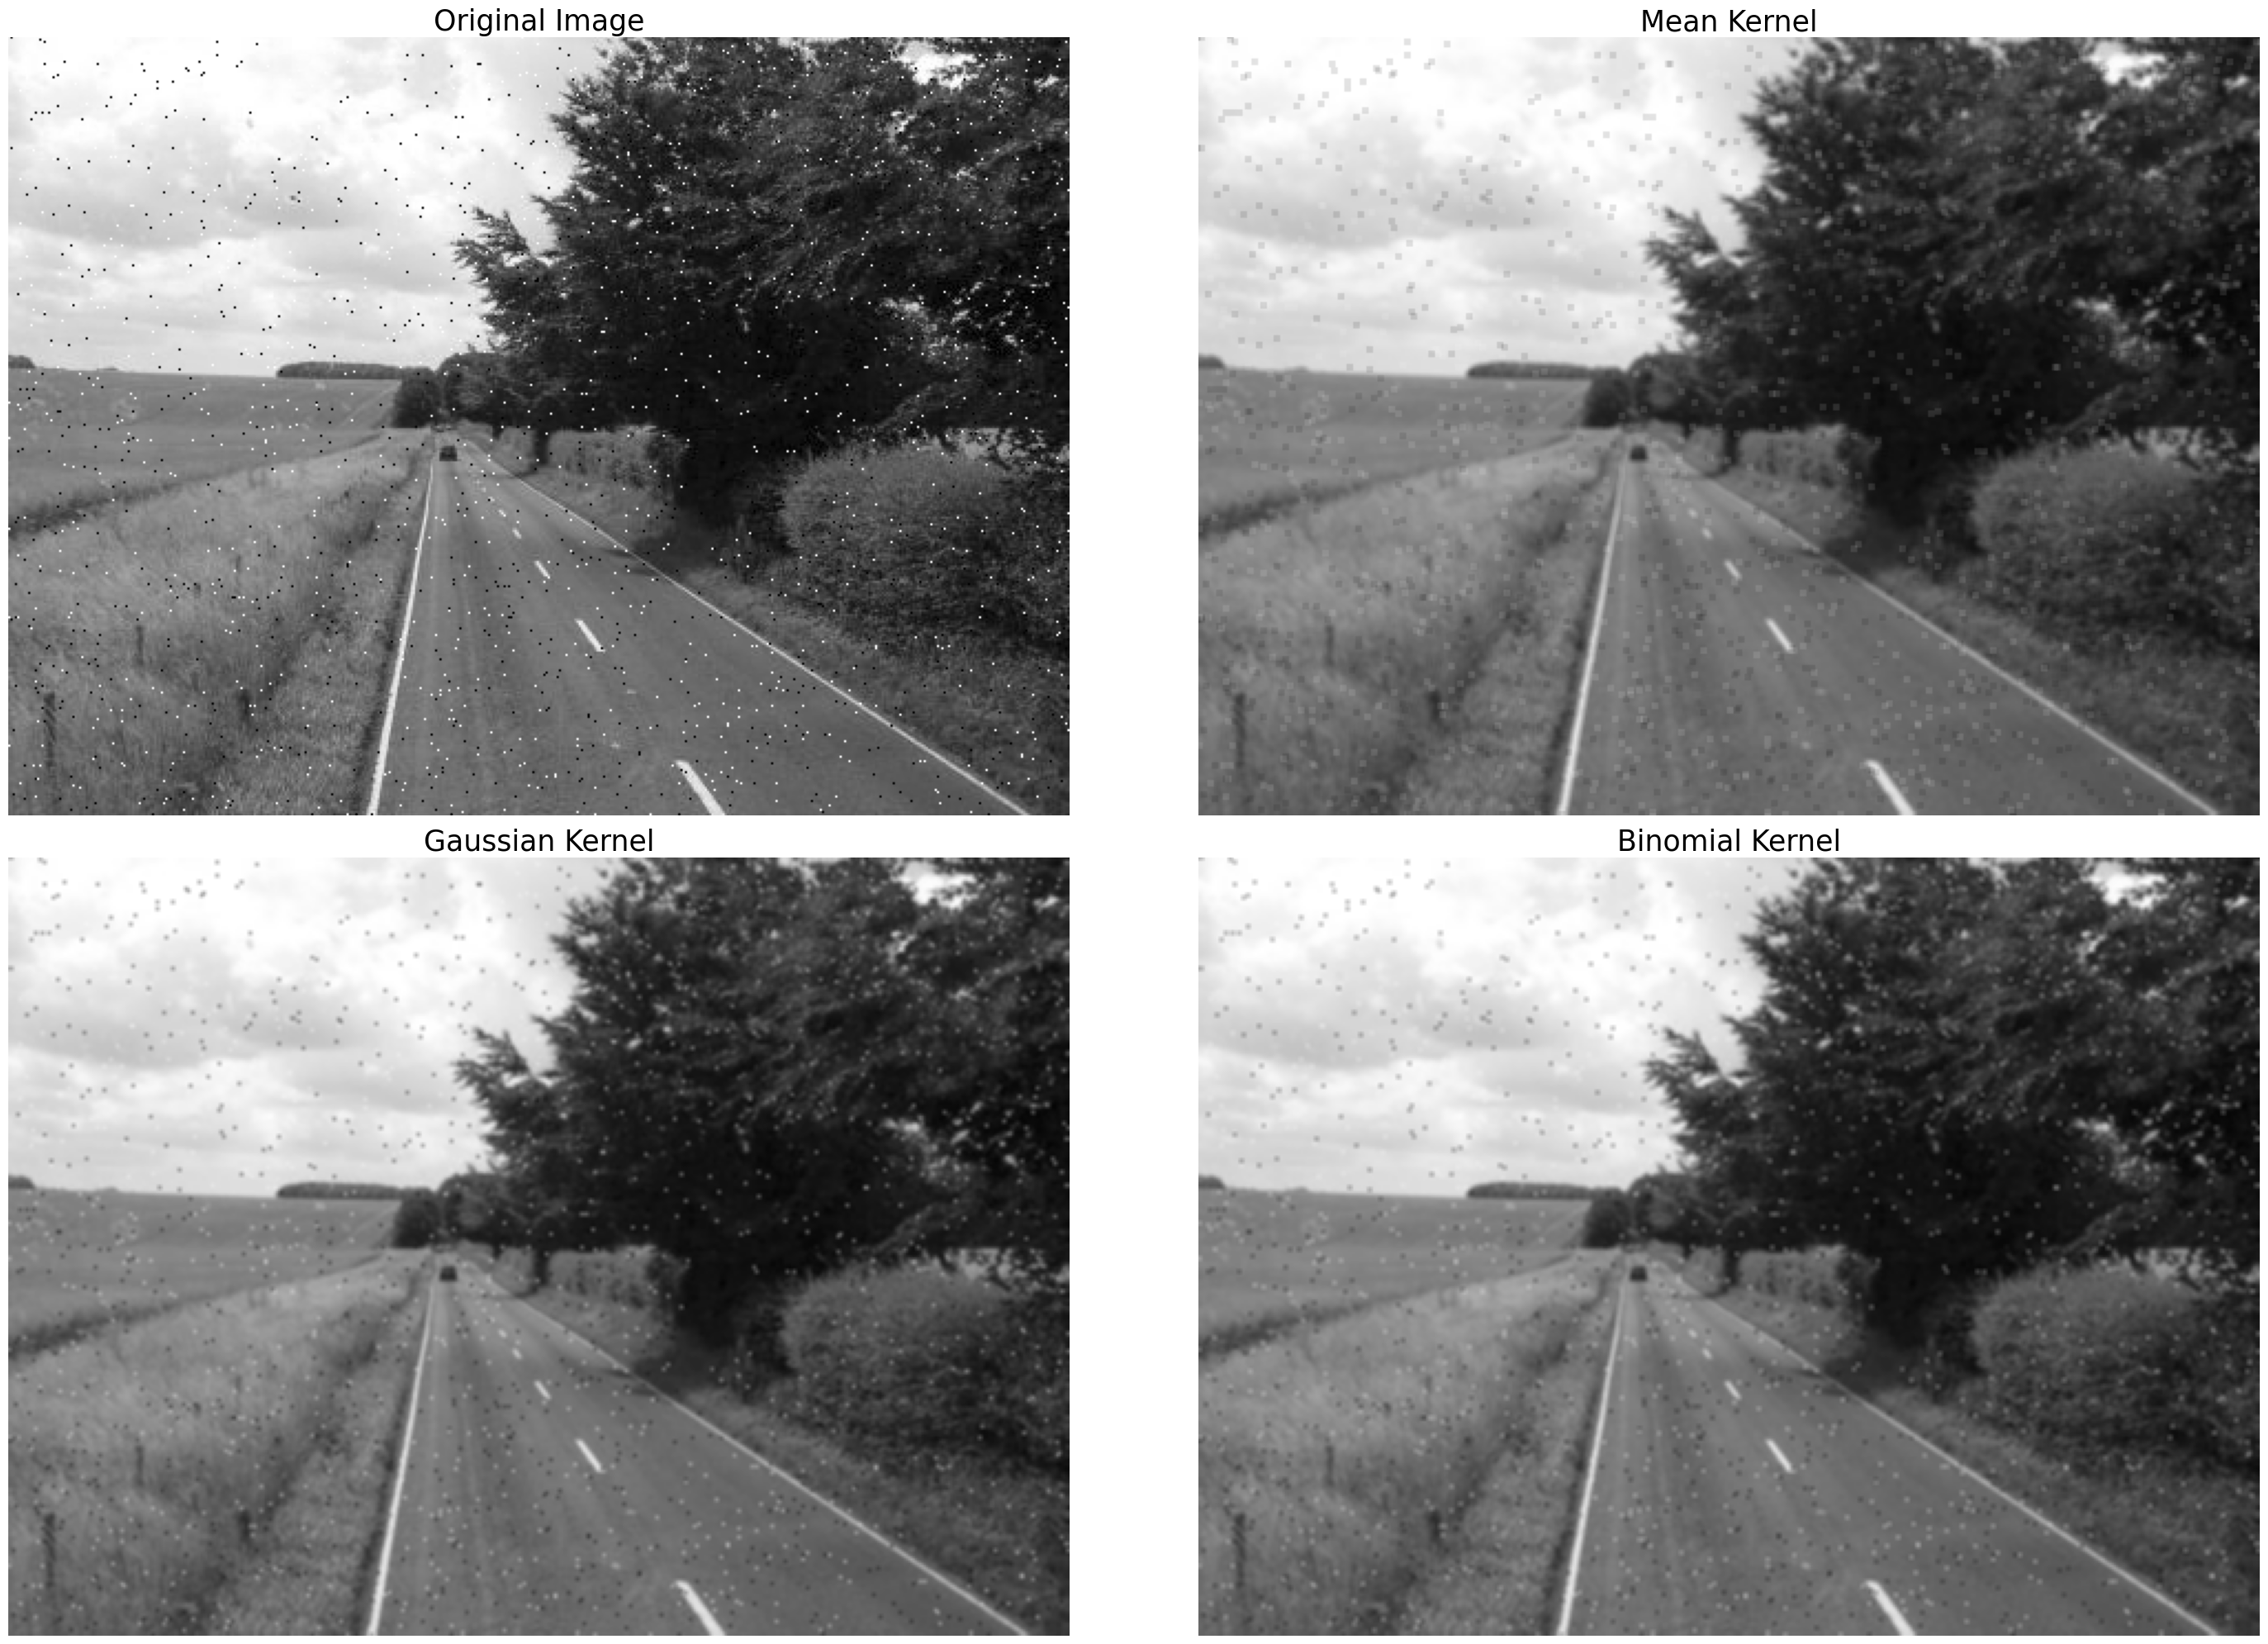

In [29]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1)
plt.title('Original Image', fontsize=25)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Mean Kernel', fontsize=25)
plt.imshow(mean_image)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Gaussian Kernel', fontsize=25)
plt.imshow(gaussian_image)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Binomial Kernel', fontsize=25)
plt.imshow(binomial_image)
plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Edge Detection

In [15]:
image_path = 'SchwarzerKreis.png'
# image_path = 'roadSaP.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.int16)

In [16]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

In [17]:
sobel_x_image = cv2.filter2D(image, -1, sobel_x)
sobel_y_image = cv2.filter2D(image, -1, sobel_y)


# sobel_x_image = np.abs(sobel_x_image)
# sobel_y_image = np.abs(sobel_y_image)

sobel_x_image = cv2.normalize(sobel_x_image, None, 0, 255, cv2.NORM_MINMAX)
sobel_y_image = cv2.normalize(sobel_y_image, None, 0, 255, cv2.NORM_MINMAX)

sobel_combined = cv2.addWeighted(sobel_x_image, 0.5, sobel_y_image, 0.5, 0)

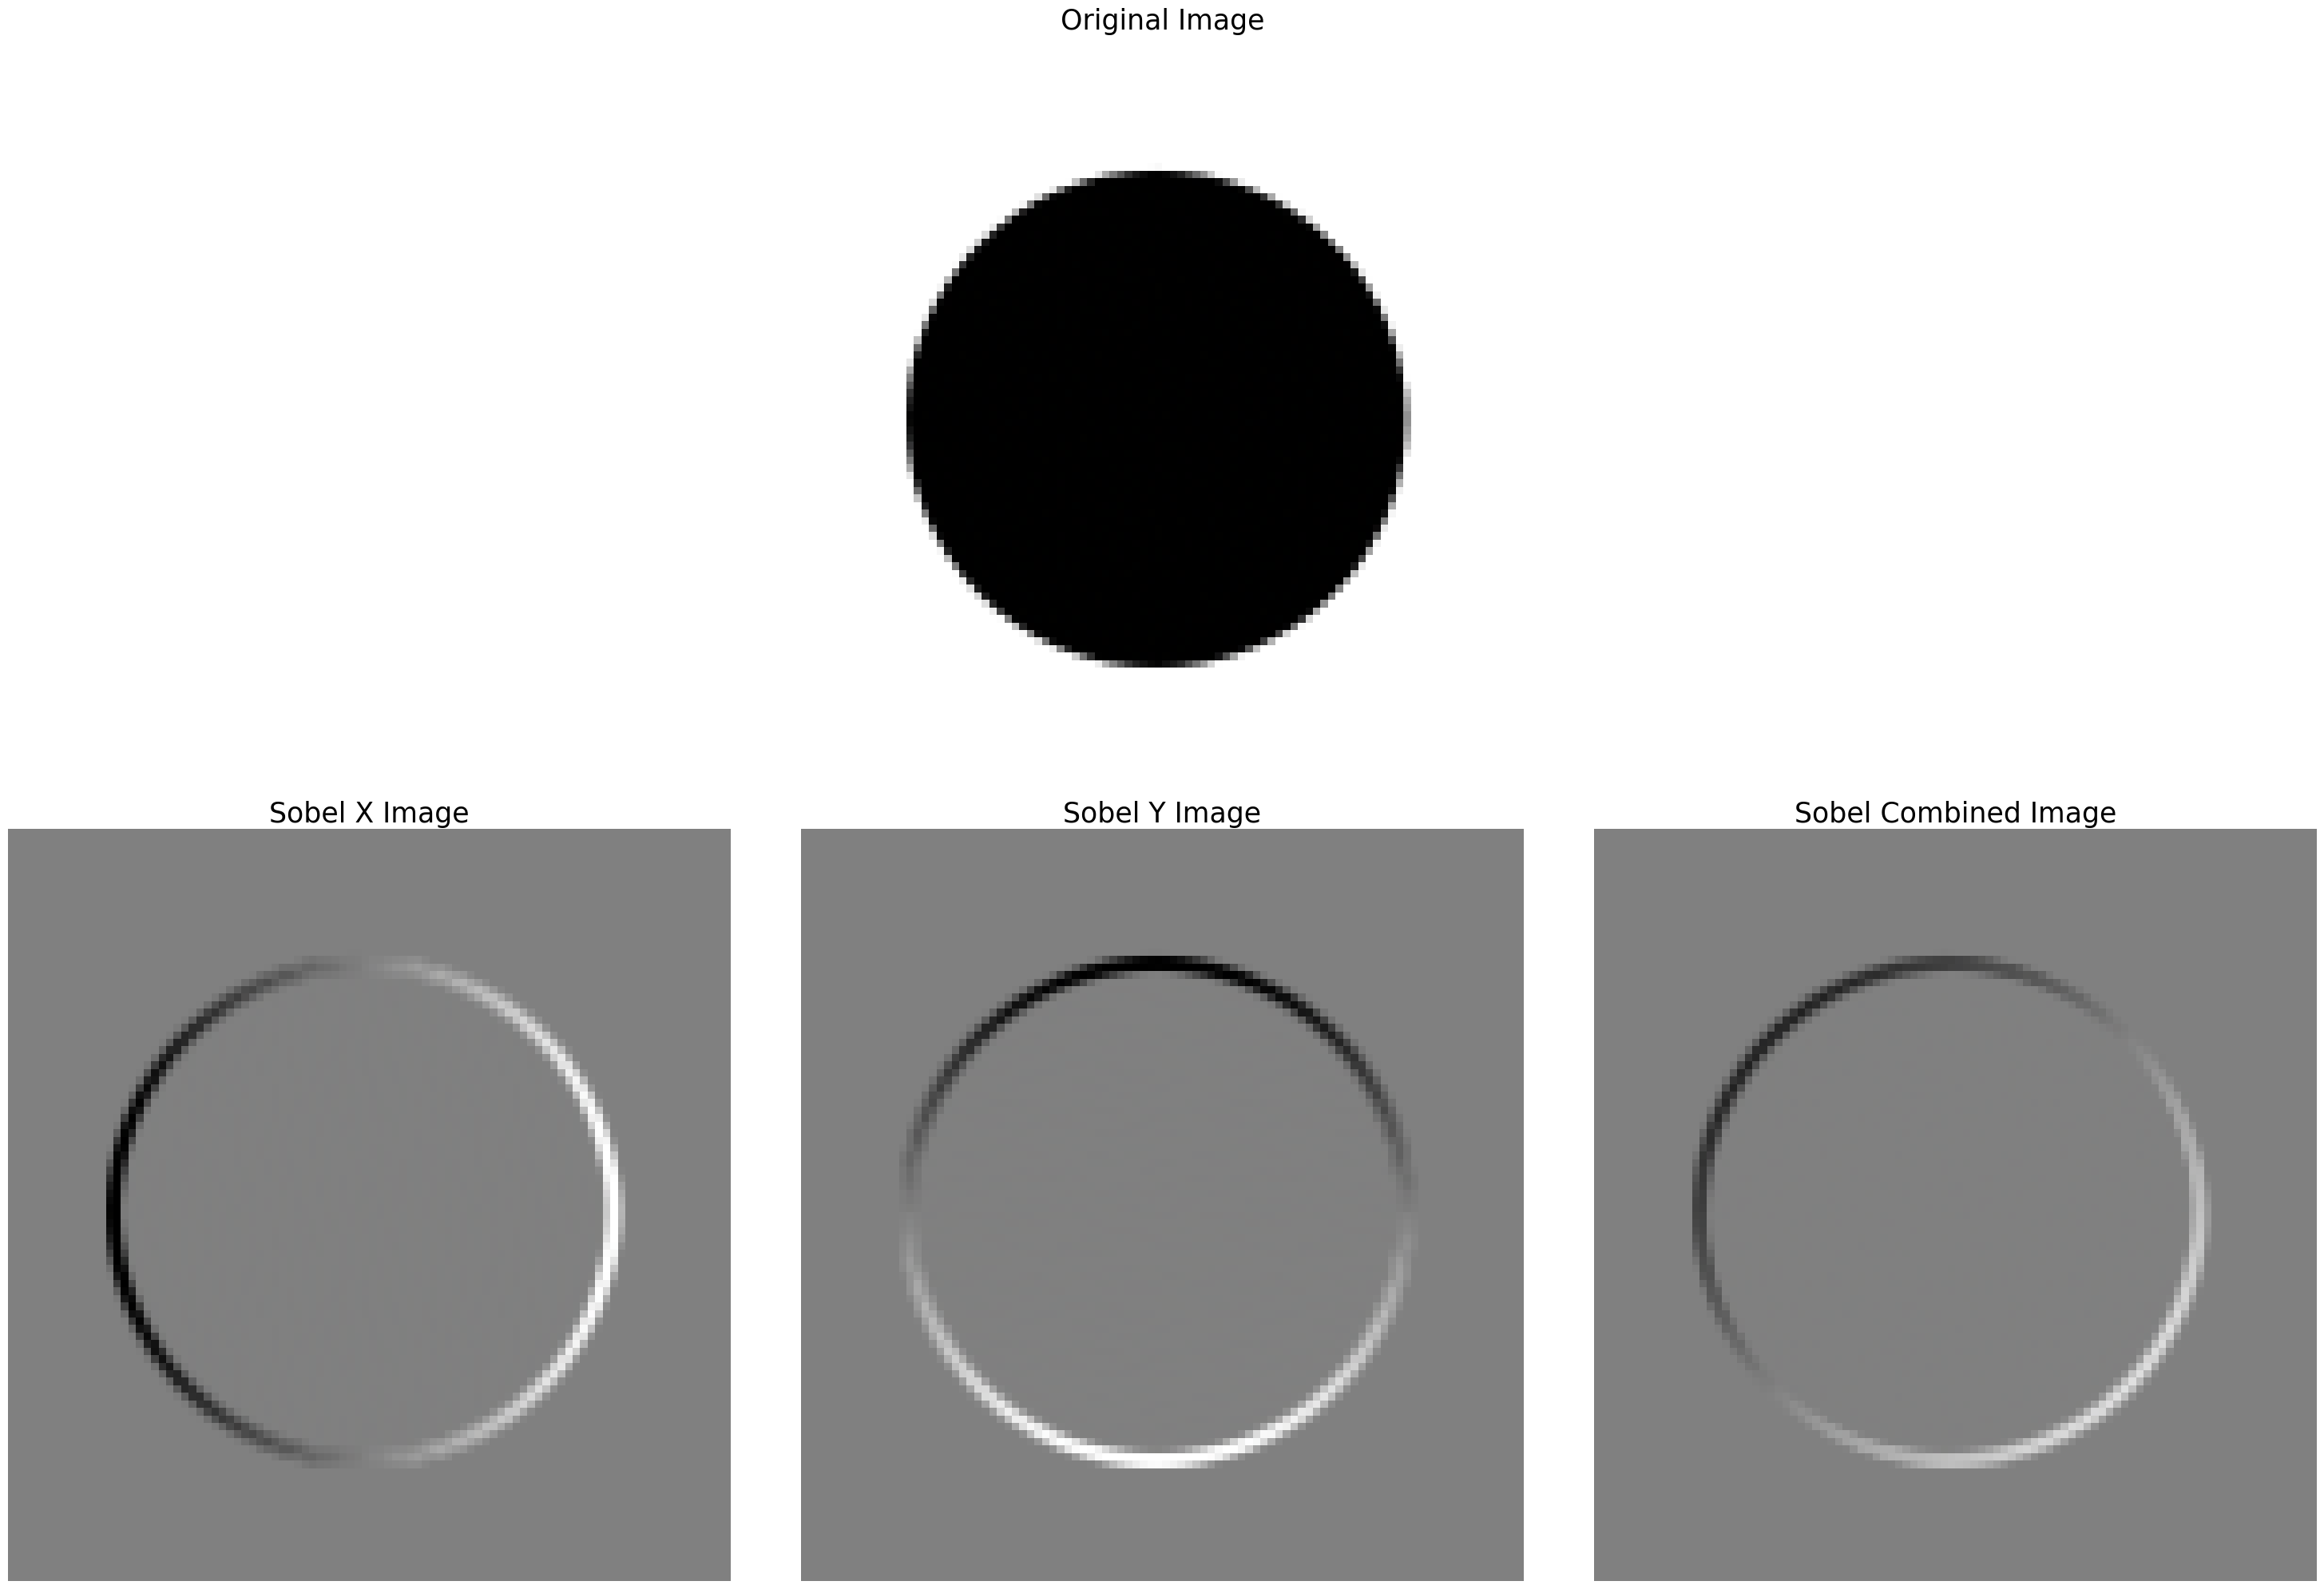

In [18]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 3, 2)
plt.title('Original Image', fontsize=25)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 3, 4)
plt.title('Sobel X Image', fontsize=25)
plt.imshow(sobel_x_image)
plt.axis('off')
plt.subplot(2, 3, 5)
plt.title('Sobel Y Image', fontsize=25)
plt.imshow(sobel_y_image)
plt.axis('off')
plt.subplot(2, 3, 6)
plt.title('Sobel Combined Image', fontsize=25)
plt.imshow(sobel_combined)
plt.axis('off')
plt.tight_layout()
plt.show()